# Sarsaによる価値反復法の実装
- 価値反復法には報酬の概念が必要。
- 時刻tでもらえる報酬を$R_t$とし、**即時報酬**と呼ぶ。
- また、今後未来でもらえる報酬の合計を報酬和と呼ぶ
$$
G_t = R_{t+1} + R_{t+2} + ...
$$
となる。
- また、時間が経つにつれ報酬の価値は低下する必要がある(報酬の価値が時間の経過につれ低下していく)
- よって、時間により報酬の低下を加味した報酬和を設定する必要がある。
$$
G_t = R_{t+1} + γR_{t+2} + γ^{2}R_{t+3} + ...
$$

### 迷路問題にも価値という概念を実装する

現在エージェントがS7にいると仮定し（状態:s = 7）, 行動:a = 右 であればS7→S8と移動することによりゴールすることができる。
##### 行動価値関数
行動価値関数$Q^π (s, a)$と表される。
右へ移動するのはインデックスがa = 1の時なので、
$$
Q^π (s = 7, a = 1) = R_{t+1} = 1
$$
となる

逆に、a=0,つまりエージェントが上にいく行動をとるときの価値を考えると、そこから最短でゴールするまでS7-S4-S7-S8と2step余計に時間がかかる。
つまり、
$$
Q^π (s = 7, a = 0) = γ^2 * 1
$$
となる。つまり、時間分だけ割引いた価値がその行動(S7から上に移動する)にはあると考えれる。


### 状態価値関数
**ベルマン方程式をあとでホワイトボードに書きながら分解する!!!**
→した
![ベルマン方程式](bellman_equation.jpg "マルコフ決定過程のおまけ付き")

# 価値反復法をSarsaで実装する！
今回はQではなくまずはSarsaで。サルサ！

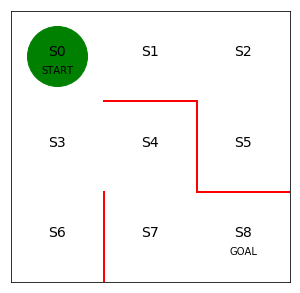

In [5]:
# まずはマップとtheta_0の定義。
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 初期状態での迷路の様子_

# 図を描く大きさと、図の変数を宣言。
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# make wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# make points
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定とメモリを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地に丸を描画する。
line, = ax.plot([0.5], [2.5], 'o', color = 'g', markersize=60)

# 初期の方策を決定するparams theta_0を設定

# 行は0~7, 列は移動方向で上右下左を表す。
theta_0 = np.array([[np.nan, 1, 1, np.nan],  
                   [np.nan, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                   [1, 1, 1, np.nan],        
                   [np.nan, np.nan, 1, 1],   
                   [1, np.nan, np.nan, np.nan],  
                   [1, np.nan, np.nan, np.nan],  
                   [1, 1, np.nan, np.nan],       
                    ])

In [6]:
# 初期の行動価値関数Qを設定。
# 最初はランダムでパラメータを定義、theta_0をかけてnanを反映する。

[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [7]:
# 方策パラメータthetaを割合の方策piに変換する関数の定義
# 割合にすることで、行動がランダムになる


def simple_convert_into_pi_from_theta(theta):
    """単純に割合を計算する"""
    
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算
    
    pi = np.where( np.isnan(pi),0,pi)
    
    return pi

In [9]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [25]:
print(Q)
print('-'*20)
print('hogehoge' + str(Q[1,:]))
print('hogehogehoge' + str(np.nanargmax(Q[1, :])))
print('-'*20)
print(pi_0)

[[       nan 0.84547268 0.72229984        nan]
 [       nan 0.11365251        nan 0.44224128]
 [       nan        nan 0.78955213 0.35250939]
 [0.46424529 0.23072386 0.48251884        nan]
 [       nan        nan 0.94809673 0.48055842]
 [0.81171535        nan        nan        nan]
 [0.45109565        nan        nan        nan]
 [0.26055437 0.88030142        nan        nan]]
--------------------
hogehoge[       nan 0.11365251        nan 0.44224128]
hogehogehoge3
--------------------
[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


## ε- greedy法
- 一定確率(ε)でランダムに動き、(1-ε)でQの最大値の行動をとる。
- これにより、例えば初期段階でのランダムによるゴールで0-1-0-3-4-7-8と行動をとったとすると、
一度とった1の行動も有効なものだと捉えられ、1を踏まえた行動をしてしまうことがある。
- それを防ぐため、定期的にランダムな行動を行い、最適な行動を探索する。

In [26]:
# ε- greedy法を実装
def get_action(s, Q, eqsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    
    # 行動を決める
    if np.random.rand() < epsilon:
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == 'up':
        action = 0
    elif next_direction == 'right':
        action = 1
    elif next_direction == 'down':
        action = 2
    elif next_direction == 'left':
        action = 3
        
    return action

In [27]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]  # 行動aの方向
    
    
    # 行動から次の状態を決める
    if next_direction == 'up':
        s_next = s - 3
    if next_direction == 'right':
        s_next = s + 1
    if next_direction == 'down':
        s_next = s + 3
    if next_direction == 'left':
        s_next = s - 1
        
    return s_next